### Load Modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Prepare/collect data

In [ ]:
import os

os.chdir('/content/drive/My Drive/Spring 2024/CS584/brain_tumor/Training/')
print("Current working directory:", os.getcwd())
classes = {'no_tumor':0, 'pituitary_tumor':1}

Current working directory: /content/drive/My Drive/Spring 2024/CS584/brain_tumor/Training


In [ ]:
# Initialize counters
counts = {'no_tumor': 0, 'pituitary_tumor': 0}

# Iterate through the folders and count the images
for class_name in classes:
    class_dir = os.path.join(os.getcwd(), class_name)
    if os.path.exists(class_dir):
        for file in os.listdir(class_dir):
            if file.endswith('.png') or file.endswith('.jpg'):
                counts[class_name] += 1

# Print the counts
print("Number of images in 'no tumor':", counts['no_tumor'])
print("Number of images in 'pituitary tumor':", counts['pituitary_tumor'])

Number of images in 'no tumor': 395
Number of images in 'pituitary tumor': 827


In [ ]:
import cv2
X = []
Y = []
for cls in classes:
    pth = '/content/drive/My Drive/Spring 2024/CS584/brain_tumor/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [ ]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [ ]:
np.unique(Y)

array([0, 1])

In [ ]:
pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

In [ ]:
X.shape, X_updated.shape

((1222, 200, 200), (1222, 40000))

### Visualize data

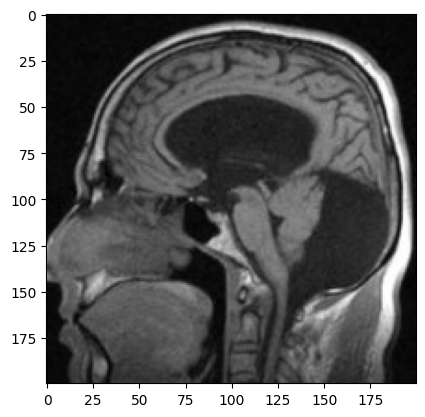

In [ ]:
plt.imshow(X[0], cmap='gray')

### Prepare data

In [ ]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

### Split Data

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [ ]:
xtrain.shape, xtest.shape

((977, 40000), (245, 40000))

### Feature Scaling

In [ ]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


### Train Model

In [ ]:
from sklearn.svm import SVC

In [ ]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

### Evaluation

In [ ]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9938587512794268
Testing Score: 0.963265306122449


### Prediction

In [ ]:
pred = sv.predict(xtest)


In [ ]:
misclassified=np.where(ytest!=pred)
misclassified

(array([ 33,  53,  60,  66,  99, 138, 153, 158, 222]),)

In [ ]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],ytest[36])

Total Misclassified Samples:  9
1 1


### TEST MODEL

In [ ]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

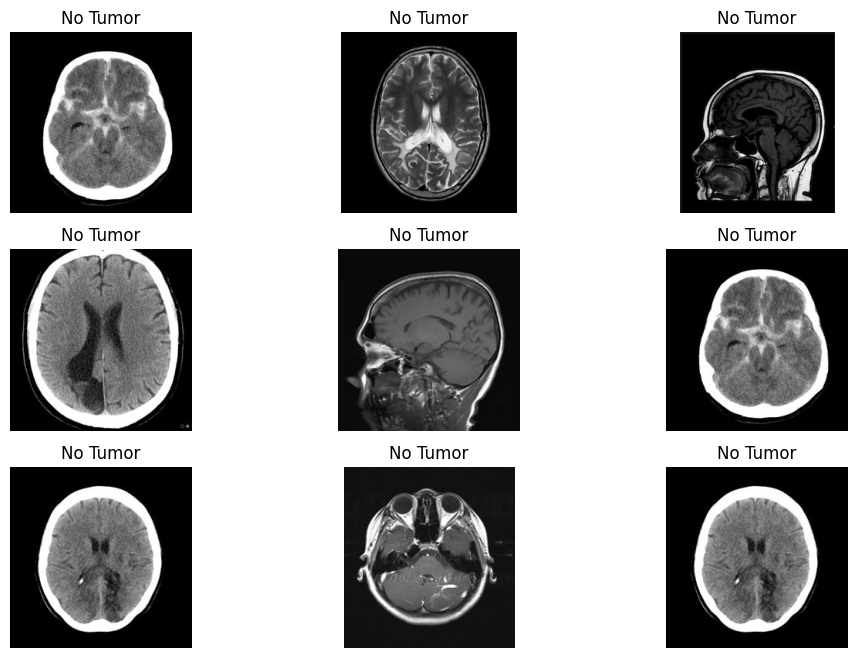

In [ ]:
plt.figure(figsize=(12,8))
p = os.listdir('/content/drive/My Drive/Spring 2024/CS584/brain_tumor/Testing/')
c=1
for i in os.listdir('/content/drive/My Drive/Spring 2024/CS584/brain_tumor/Testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)

    img = cv2.imread('/content/drive/My Drive/Spring 2024/CS584/brain_tumor/Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200)).reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

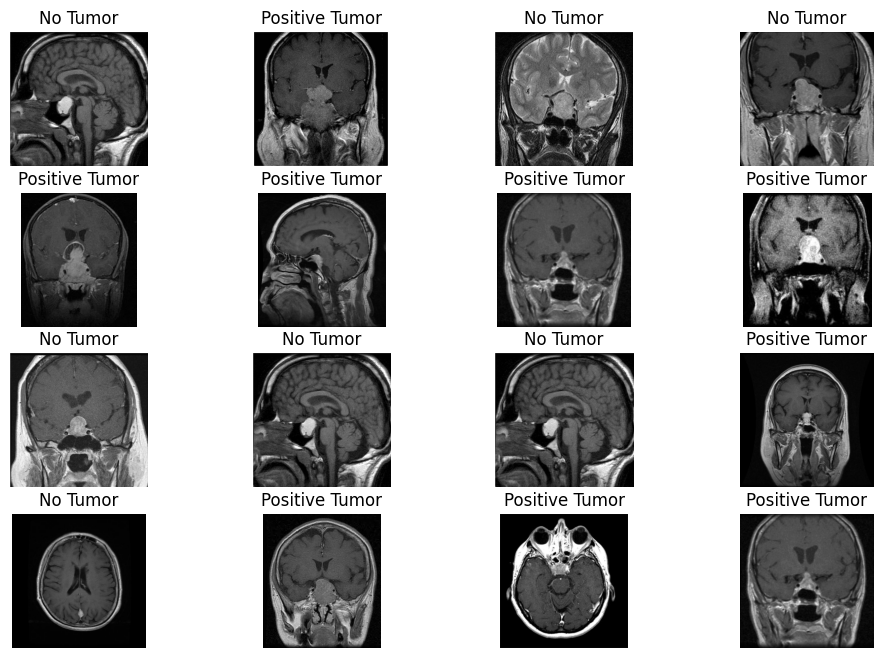

In [ ]:
plt.figure(figsize=(12,8))
p = os.listdir('/content/drive/My Drive/Spring 2024/CS584/brain_tumor/Testing/')
c=1
for i in os.listdir('/content/drive/My Drive/Spring 2024/CS584/brain_tumor/Testing/pituitary_tumor/')[:16]:
    plt.subplot(4,4,c)

    img = cv2.imread('/content/drive/My Drive/Spring 2024/CS584/brain_tumor/Testing/pituitary_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

In [ ]:
# Initialize variables to store predictions and ground truth
predicted_labels = []
true_labels = []

# Loop through the images in the pituitary_tumor directory
for i in os.listdir('/content/drive/My Drive/Spring 2024/CS584/brain_tumor/Testing/pituitary_tumor/'):
    # Read the image
    img = cv2.imread('/content/drive/My Drive/Spring 2024/CS584/brain_tumor/Testing/pituitary_tumor/'+i, 0)
    # Resize the image
    img1 = cv2.resize(img, (200, 200))
    # Flatten and normalize the image
    img1 = img1.reshape(1, -1) / 255
    # Make prediction
    p = sv.predict(img1)
    # Decode the predicted label
    predicted_label = dec[p[0]]
    # Get the true label from the file name (assuming file name contains label information)
    true_label = 'Positive Tumor'  # Change this based on your naming convention
    # Append predicted and true labels to their respective lists
    predicted_labels.append(predicted_label)
    true_labels.append(true_label)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy of pituitary tumor:", accuracy)

Accuracy of pituitary tumor: 0.6351351351351351


In [ ]:
# Initialize variables to store predictions and ground truth for no tumor images
predicted_labels_no_tumor = []
true_labels_no_tumor = []

# Loop through the images in the no_tumor directory
for i in os.listdir('/content/drive/My Drive/Spring 2024/CS584/brain_tumor/Testing/no_tumor/'):
    # Read the image
    img = cv2.imread('/content/drive/My Drive/Spring 2024/CS584/brain_tumor/Testing/no_tumor/'+i, 0)
    # Resize the image
    img1 = cv2.resize(img, (200, 200))
    # Flatten and normalize the image
    img1 = img1.reshape(1, -1) / 255
    # Make prediction
    p = sv.predict(img1)
    # Decode the predicted label
    predicted_label = dec[p[0]]
    # Get the true label from the file name (assuming file name contains label information)
    true_label = 'No Tumor'  # Change this based on your naming convention
    # Append predicted and true labels to their respective lists
    predicted_labels_no_tumor.append(predicted_label)
    true_labels_no_tumor.append(true_label)

# Calculate accuracy for no tumor images
accuracy_no_tumor = accuracy_score(true_labels_no_tumor, predicted_labels_no_tumor)
print("Accuracy of no tumor images:", accuracy_no_tumor)

Accuracy of no tumor images: 0.9904761904761905
